<a href="https://colab.research.google.com/github/ivonakupanova/fake-or-real-news-predictor/blob/main/FakeOrRealNews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 

In [ ]:
import numpy as np

In [ ]:
from sklearn.preprocessing import LabelEncoder 

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
dataset_true = pd.read_csv('/content/drive/MyDrive/Data science/Datasets/True.csv')

In [ ]:
dataset_fake = pd.read_csv('/content/drive/MyDrive/Data science/Datasets/Fake.csv')

In [ ]:
dataset_true

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [ ]:
dataset_fake

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


#Data preprocessing

In [ ]:
dataset_true['type']='true'

In [ ]:
dataset_fake['type']='fake'

In [ ]:
dataset_true

,title,text,subject,date,type
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",true
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",true
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",true
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",true
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",true
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",true
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",true
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",true
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",true


In [ ]:
dataset = pd.concat([dataset_true,dataset_fake],ignore_index=True)

In [ ]:
dataset

,title,text,subject,date,type
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",true
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",true
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",true
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",true
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",true
...,...,...,...,...,...
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",fake
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",fake
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",fake
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",fake


Checking for missing values

In [ ]:
dataset.isna().sum()

title      0
text       0
subject    0
date       0
type       0
dtype: int64

Exploratory Data Analysis

In [ ]:
dataset['subject'].value_counts()

politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64

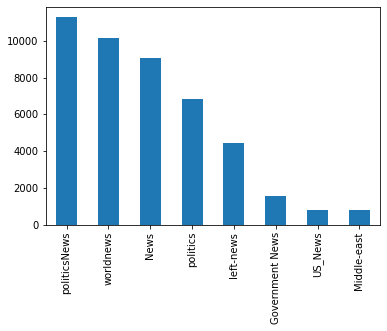

In [ ]:
dataset['subject'].value_counts().plot.bar()

In [ ]:
x = dataset['type'].value_counts()

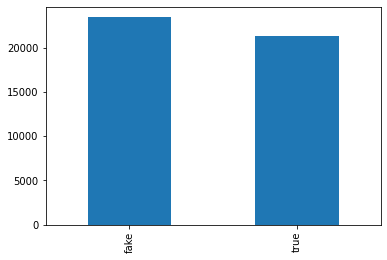

In [ ]:
x.plot.bar()

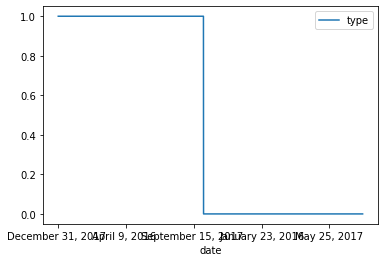

In [ ]:
dataset.plot(x="date", y="type", kind="line")
plt.show()

Encoding categorical variables

In [ ]:
le = LabelEncoder() 
dataset['subject']= le.fit_transform(dataset['subject']) 

Input/Output variables

In [ ]:
X = dataset['text']
Y = pd.get_dummies(dataset['type']).values
num_classes = dataset['type'].nunique()

Split the dataset 




In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, 
                                                    test_size=0.2,
                                                    random_state=1)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(35918,) (8980,) (35918, 2) (8980, 2)


Tokenization (text processing)

In [ ]:

from keras.preprocessing.text import Tokenizer

In [ ]:
max_features = 20000
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(X_train))
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [ ]:
X_train[4]

[69,
 15,
 8,
 4316,
 5,
 4356,
 11,
 1,
 9997,
 5097,
 2347,
 13,
 566,
 6,
 392,
 18,
 15,
 2347,
 14,
 5,
 82,
 15,
 7593,
 248,
 1,
 369,
 5,
 180,
 28,
 1,
 546,
 13674,
 3,
 1,
 990,
 8,
 12609,
 5,
 2793,
 15950,
 70,
 367,
 2750,
 3,
 93,
 11,
 577,
 2,
 132,
 1,
 69,
 8,
 6,
 4,
 6512,
 5,
 7,
 11,
 81,
 59,
 2214,
 10296,
 116,
 9,
 533,
 10,
 1423,
 83,
 98,
 115,
 1,
 2356,
 15,
 2347,
 678,
 61,
 9,
 2214,
 10296,
 18,
 5843,
 2347,
 26,
 116,
 24,
 209,
 12610,
 9,
 7,
 14654,
 3,
 1180,
 138,
 144,
 28,
 81,
 4,
 440,
 1150,
 1492,
 154,
 1,
 1622,
 411,
 27,
 59,
 13101,
 402,
 2214,
 10296,
 116,
 31,
 5408,
 15,
 2347,
 5843,
 2347,
 326,
 138,
 237,
 919,
 501,
 1210,
 2214,
 10296,
 849,
 15,
 2347,
 18,
 5843,
 2347,
 326,
 138,
 237,
 6757,
 2117,
 501,
 1328,
 5228,
 2214,
 10296,
 15,
 2517,
 11,
 597,
 326,
 138,
 237,
 501,
 1210,
 5228,
 2214,
 10296,
 15,
 2517,
 11,
 597,
 326,
 138,
 237,
 501,
 1210,
 5228,
 546,
 164,
 2,
 132,
 146,
 15,
 8,
 3808,
 11,

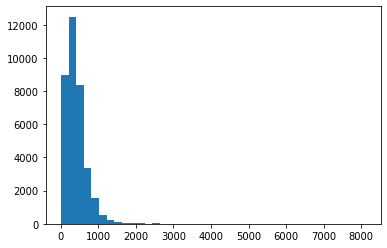

In [ ]:
totalNumWords = [len(one_comment) for one_comment in X_train]
plt.hist(totalNumWords,bins = 40)
plt.show()

In [ ]:
from keras.preprocessing import sequence

In [ ]:
max_words = 400
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)
print(X_train.shape,X_test.shape)

(35918, 400) (8980, 400)


In [ ]:
X_train

array([[  238,    36,  2056, ...,   756,     9,   203],
       [   13,   655,  3887, ...,  5459,   562,   497],
       [    0,     0,     0, ...,  2275,     6,  2145],
       ...,
       [    0,     0,     0, ...,     1,  4031,    12],
       [   53,     1,   443, ...,   919, 16062,    12],
       [    0,     0,     0, ...,   715,   973,   315]], dtype=int32)

Clustering

In [ ]:
from sklearn.cluster import KMeans

inertia = []
for k in range(1, 8):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(X_train)
    inertia.append(np.sqrt(kmeans.inertia_))

Text(0, 0.5, '$J(C_k)$')

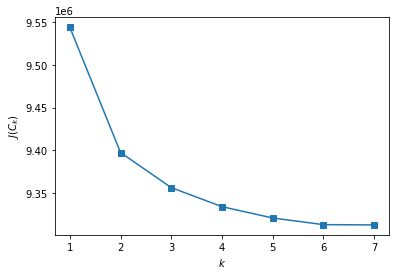

In [ ]:
plt.plot(range(1, 8), inertia, marker='s')
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$')

In [ ]:
 from sklearn.cluster import KMeans

km = KMeans(n_clusters=2)
km.fit(X_train)
clusters = km.labels_.tolist()

In [ ]:
from sklearn.decomposition import PCA


data = X_train
pca = PCA(2)
 
#Transform the data
df_new = pca.fit_transform(data)

In [ ]:
kmeans = KMeans(n_clusters=2)
 
#predict the labels of clusters.
label = kmeans.fit_predict(df_new)
 
#Getting unique labels
u_labels = np.unique(label)
 
labels = kmeans.labels_

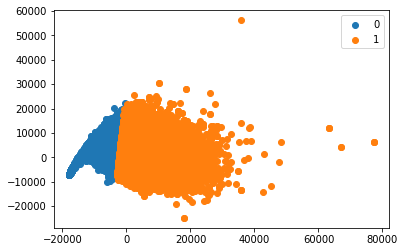

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#plotting the results:
for i in u_labels:
    plt.scatter(df_new[label == i , 0] , df_new[label == i , 1] , label = i)
plt.legend()
plt.show()


#NN

In [ ]:

model_nn = Sequential()
model_nn.add(Dense(32, input_dim=400, kernel_initializer = 'uniform', activation='relu'))
model_nn.add(Dense(64,kernel_initializer = 'uniform', activation='relu'))
model_nn.add(Dense(64,kernel_initializer = 'uniform', activation='relu'))
model_nn.add(Dense(16,kernel_initializer = 'uniform', activation='relu'))
model_nn.add(Dense(num_classes, activation='softmax'))

In [ ]:
model_nn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model_nn.fit(X_train, Y_train, epochs=30, batch_size=128)

Epoch 1/30
281/281 [==============================] - 1s 2ms/step - loss: 0.7081 - accuracy: 0.5633
Epoch 2/30
281/281 [==============================] - 1s 2ms/step - loss: 0.6625 - accuracy: 0.5972
Epoch 3/30
281/281 [==============================] - 1s 2ms/step - loss: 0.6463 - accuracy: 0.6021
Epoch 4/30
281/281 [==============================] - 1s 2ms/step - loss: 0.6298 - accuracy: 0.6058
Epoch 5/30
281/281 [==============================] - 1s 2ms/step - loss: 0.6131 - accuracy: 0.6111
Epoch 6/30
281/281 [==============================] - 1s 2ms/step - loss: 0.5982 - accuracy: 0.6286
Epoch 7/30
281/281 [==============================] - 1s 2ms/step - loss: 0.5788 - accuracy: 0.6498
Epoch 8/30
281/281 [==============================] - 1s 2ms/step - loss: 0.5611 - accuracy: 0.6665
Epoch 9/30
281/281 [==============================] - 1s 2ms/step - loss: 0.5430 - accuracy: 0.6819
Epoch 10/30
281/281 [==============================] - 1s 2ms/step - loss: 0.5243 - accuracy: 0.6962

In [ ]:
y_pred_nn = model_nn.predict(X_test)

In [ ]:
y_pred_nn = y_pred_nn.round()

In [ ]:
accuracy_score(Y_test,y_pred_nn)

0.6237193763919822

#CNN + LSTM

In [ ]:
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense,Embedding,Conv1D,MaxPooling1D,LSTM, Flatten, Dropout
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
K.clear_session()
model_cnn = Sequential()
model_cnn.add(Embedding(max_features, 400, input_length=X_train.shape[1]))
model_cnn.add(Conv1D(filters=16, kernel_size=3, padding='same', activation='relu'))
model_cnn.add(MaxPooling1D(pool_size=2))
#model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
#model.add(MaxPooling1D(pool_size=2))    
model_cnn.add(LSTM(32, dropout=0.2, recurrent_dropout=0.2))
model_cnn.add(Dense(num_classes, activation='softmax'))

In [ ]:

model_cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# fit the keras model on the dataset
history_cnn = model_cnn.fit(X_train, Y_train, epochs=5, batch_size=128, validation_split=0.2)

Epoch 1/5
225/225 [==============================] - 173s 768ms/step - loss: 0.0200 - accuracy: 0.9942 - val_loss: 0.0300 - val_accuracy: 0.9919
Epoch 2/5
225/225 [==============================] - 158s 701ms/step - loss: 0.0103 - accuracy: 0.9969 - val_loss: 0.0169 - val_accuracy: 0.9953
Epoch 3/5
225/225 [==============================] - 158s 703ms/step - loss: 0.0033 - accuracy: 0.9994 - val_loss: 0.0176 - val_accuracy: 0.9954
Epoch 4/5
225/225 [==============================] - 158s 701ms/step - loss: 0.0010 - accuracy: 0.9999 - val_loss: 0.0189 - val_accuracy: 0.9957
Epoch 5/5
225/225 [==============================] - 157s 696ms/step - loss: 9.7041e-04 - accuracy: 0.9998 - val_loss: 0.0135 - val_accuracy: 0.9968


In [ ]:
# evaluate the keras model
_, accuracy = model_cnn.evaluate(X_train, Y_train)
print('Accuracy: %.2f' % (accuracy*100))

1123/1123 [==============================] - 62s 55ms/step - loss: 0.0029 - accuracy: 0.9993


In [ ]:
y_pred_cnn = model_cnn.predict(X_test)

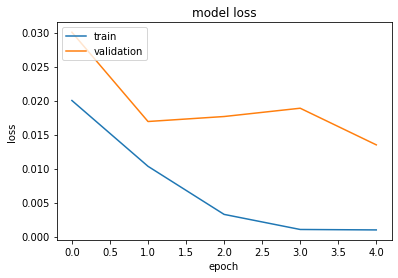

In [ ]:
# "Loss"
plt.plot(history_cnn.history['loss'])
plt.plot(history_cnn.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

#CatBoost

In [ ]:
 !pip install catboost

     |████████████████████████████████| 76.1 MB 1.3 MB/s 


od novo delenje bidejki mi treba izlezot enkodiran za boosting algoritmite

In [ ]:
X1 = dataset['text']
Y1 = np.asarray(dataset['type'])

In [ ]:
dataset['type'] = le.fit_transform(dataset['type'])

In [ ]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X1,Y1, 
                                                    test_size=0.2,
                                                    random_state=1)
print(X_train1.shape, X_test1.shape, Y_train1.shape, Y_test1.shape)

(35918,) (8980,) (35918,) (8980,)


In [ ]:
max_features = 20000
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(X_train1))
X_train1 = tokenizer.texts_to_sequences(X_train1)
X_test1 = tokenizer.texts_to_sequences(X_test1)

In [ ]:
max_words = 400
X_train1 = sequence.pad_sequences(X_train1, maxlen=max_words)
X_test1 = sequence.pad_sequences(X_test1, maxlen=max_words)

In [ ]:
from catboost import CatBoostClassifier
from random import seed

cb_model= CatBoostClassifier(loss_function='Logloss',
          eval_metric='AUC',
          verbose= 200,
          random_seed= seed(1))

cb_model.fit(X_train1,Y_train1)

Learning rate set to 0.047539
0:	total: 180ms	remaining: 2m 59s
200:	total: 32.1s	remaining: 2m 7s
400:	total: 1m 2s	remaining: 1m 33s
600:	total: 1m 32s	remaining: 1m 1s
800:	total: 2m 2s	remaining: 30.3s
999:	total: 2m 33s	remaining: 0us


In [ ]:
y_pred_cat = cb_model.predict(X_test1)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(Y_test1, y_pred_cat))
print(classification_report(Y_test1, y_pred_cat))

[[4079  599]
 [ 284 4018]]
              precision    recall  f1-score   support

           0       0.93      0.87      0.90      4678
           1       0.87      0.93      0.90      4302

    accuracy                           0.90      8980
   macro avg       0.90      0.90      0.90      8980
weighted avg       0.90      0.90      0.90      8980



In [ ]:
accuracy_score(Y_test1,y_pred_cat)

0.9016703786191537

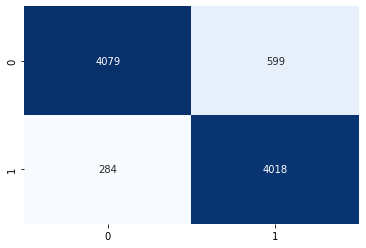

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test1, y_pred_cat)
sns.heatmap(cm,annot=True,cmap="Blues",fmt="d",cbar=False)

In [ ]:
y_pred_cat

array([1, 1, 1, ..., 0, 0, 1])

#XGBoost

In [ ]:
from xgboost import XGBClassifier


#inicialize XGBoost
model_xgb = XGBClassifier(max_depth=50, min_child_weight=1,  n_estimators=200,n_jobs=-1 , verbose=1,learning_rate=0.16)

# Add silent=True to avoid printing out updates with each cycle
#mnogu bavno :D
model_xgb.fit(X_train1, Y_train1)

#make prediction
y_pred_xgb = model_xgb.predict(X_test1)

In [ ]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(Y_test1, y_pred_xgb))

Accuracy: 0.9452115812917594


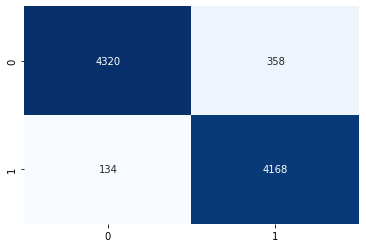

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test1, y_pred_xgb)
sns.heatmap(cm,annot=True,cmap="Blues",fmt="d",cbar=False)

#LGBM

In [ ]:
from lightgbm import LGBMClassifier

clf = LGBMClassifier()

clf.fit(X_train1, Y_train1)

y_pred_lgbm = clf.predict(X_test1)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(Y_test1, y_pred_lgbm))
print(classification_report(Y_test1, y_pred_lgbm))

[[3923  755]
 [ 260 4042]]
              precision    recall  f1-score   support

        fake       0.94      0.84      0.89      4678
        true       0.84      0.94      0.89      4302

    accuracy                           0.89      8980
   macro avg       0.89      0.89      0.89      8980
weighted avg       0.89      0.89      0.89      8980



In [ ]:
from sklearn import metrics
metrics.accuracy_score(Y_test1, y_pred_lgbm)

0.8869710467706013

In [ ]:
data = []
data.append(({
        'Neural Network': 0.66,
        'CNN + LSTM': 0.99,
        'LGBM': 0.88,
        'XGBoost': 0.94,
        'CatBoost': 0.9}))
results = pd.DataFrame(data=data,columns=['Neural network', 'CNN + LSTM', 'LGBM',
                                           'XGBoost', 'CatBoost'],
                       index=['Accuracy score'])

results

,Neural network,CNN + LSTM,LGBM,XGBoost,CatBoost
Accuracy score,NaN,0.99,0.88,0.94,0.9
